# Titanic Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster

## Import Libraries


In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [338]:
df = pd.read_csv('titanic_train 1.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [339]:
df.shape

(891, 12)

we have 891 rows and 12 columns including target

In [340]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

our target is int type which is classification kind of problem 

In [341]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [342]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are NaN values present in the Age and cabin column

### checking correlation

In [343]:
corr_mat = df.corr()

In [344]:
corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Observations:
--> our target variable Survival is more positively correlated with Fare
--> our target variable Survival is more negitively correlated with Pclass
--> less correlated with PassengerId

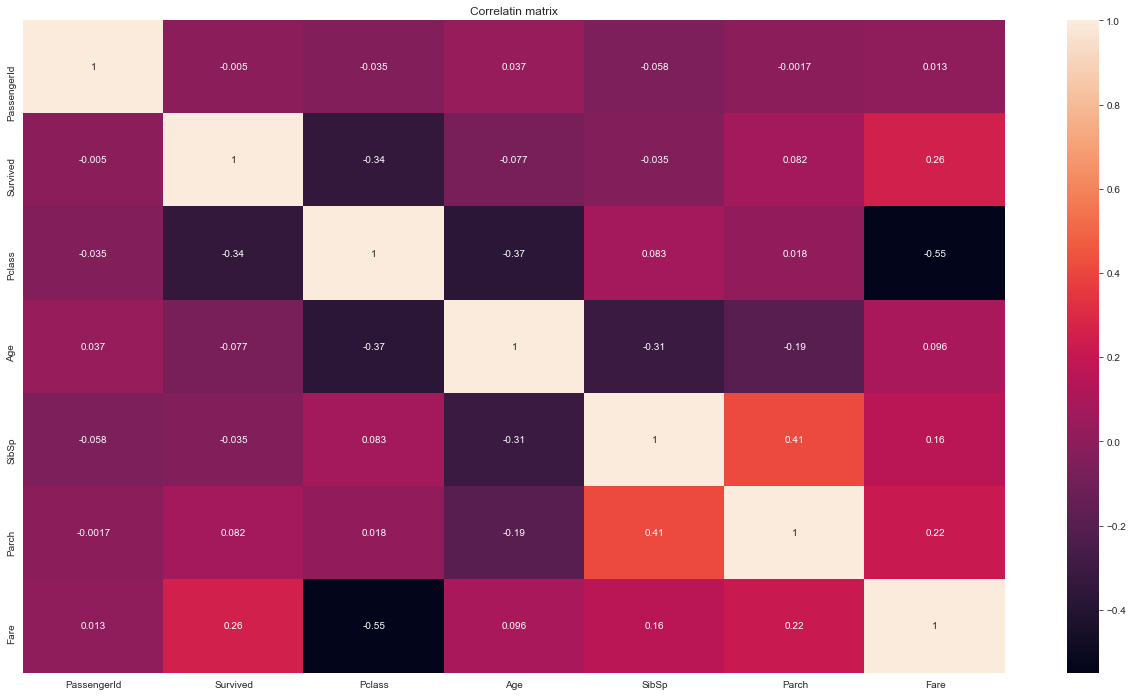

In [345]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlatin matrix')
plt.show()

In [346]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

data is balanced. so there is no imbalence problem

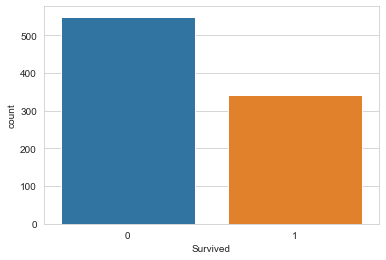

In [347]:
sn.countplot(df['Survived']);

0 represnts nor survived which is little higher than survived

In [348]:
import numpy as np

In [349]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Nan values present in the Cabin and Age column

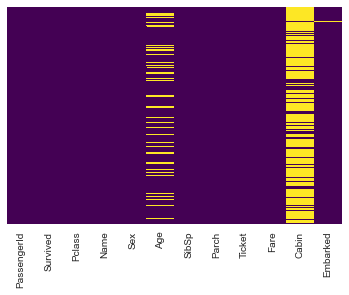

In [350]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation

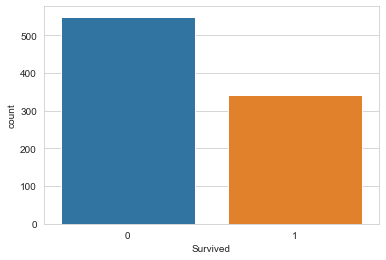

In [351]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

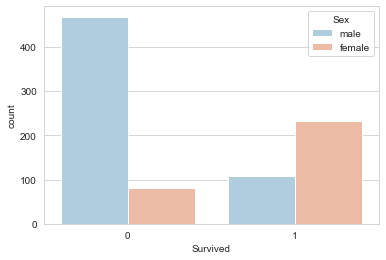

In [352]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

 womens survived more than men

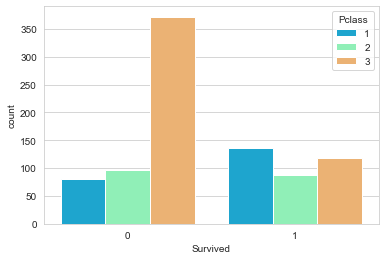

In [353]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

more death happend in the 3rd pclass poople than other

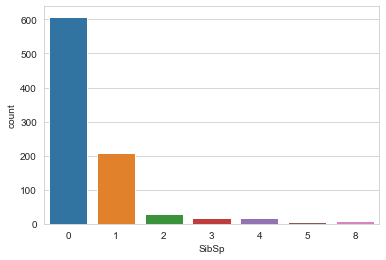

In [354]:
sns.countplot(x='SibSp',data=df)

The graph showing how many siblings or spouse presnt with the passenger

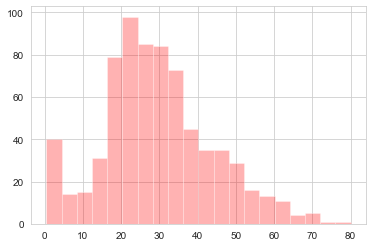

In [355]:
df['Age'].hist(bins=20,color='Red',alpha=0.3)

The graph showing age of passenger,more passenger are of 20- 40 age

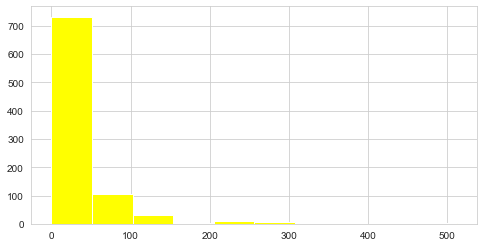

In [356]:
df['Fare'].hist(color='Yellow',bins=10,figsize=(8,4))

The above graph showing the Fare of the ticket,most ticket is between 0-50  

## data cleaning

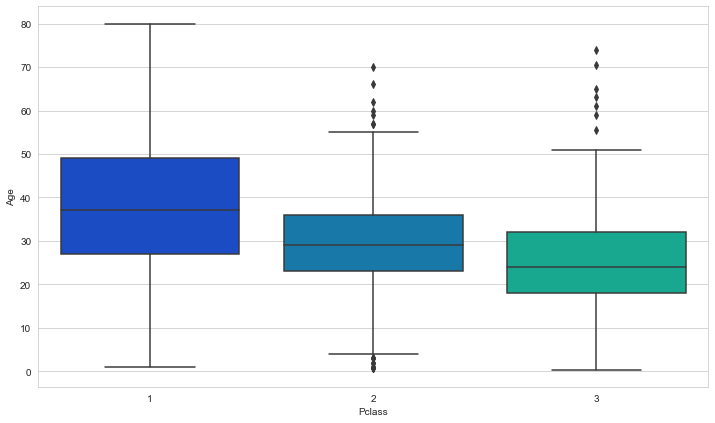

In [357]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [358]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [359]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

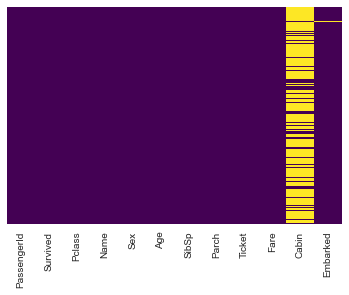

In [360]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Let's drop the Cabin column and the row in Embarked that is NaN.

In [361]:
df.drop('Cabin',axis=1,inplace=True)

In [408]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [362]:
df.dropna(inplace=True)

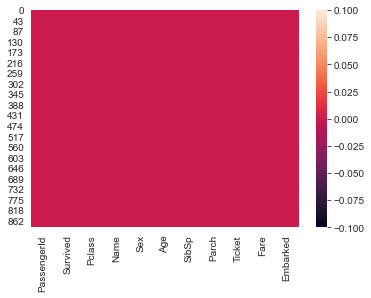

In [363]:
sns.heatmap(df.isnull())

## Converting Categorical Features


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [365]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [366]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [367]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [368]:

df = pd.concat([df,sex,embark],axis=1)

In [369]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [370]:
x = df.drop('Survived',axis =1)
y = df['Survived']

In [371]:
x.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [372]:
x.shape

(889, 9)

In [373]:
y.shape

(889,)

## finding the best random state

In [374]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [375]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS =0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    predrf= lr.predict(x_test)
    accu = accuracy_score(y_test,predrf)
    if accu >maxAccu:
        maxAccu = accu
        maxRS =i
print('best accuray score is',maxAccu,"random_state is",i)

best accuray score is 0.846441947565543 random_state is 199


In [376]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=199)

In [377]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.8052434456928839
[[143  24]
 [ 28  72]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       167
           1       0.75      0.72      0.73       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [378]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy score :
0.7602996254681648
[[133  34]
 [ 30  70]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       167
           1       0.67      0.70      0.69       100

    accuracy                           0.76       267
   macro avg       0.74      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



In [379]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.6629213483146067
[[165   2]
 [ 88  12]]
              precision    recall  f1-score   support

           0       0.65      0.99      0.79       167
           1       0.86      0.12      0.21       100

    accuracy                           0.66       267
   macro avg       0.75      0.55      0.50       267
weighted avg       0.73      0.66      0.57       267



In [380]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.850187265917603
[[156  11]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       167
           1       0.87      0.71      0.78       100

    accuracy                           0.85       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.85      0.85       267



In [381]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred = etc.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.8352059925093633
[[152  15]
 [ 29  71]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       167
           1       0.83      0.71      0.76       100

    accuracy                           0.84       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.84      0.83       267



In [382]:
import xgboost as xgb
Xg = xgb.XGBClassifier()
Xg.fit(x_train,y_train)
pred = Xg.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[02:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy score :
0.797752808988764
[[145  22]
 [ 32  68]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       167
           1       0.76      0.68      0.72       100

    accuracy                           0.80       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267



In [383]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(x_train, y_train)
pred = kn.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.6292134831460674
[[127  40]
 [ 59  41]]
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       167
           1       0.51      0.41      0.45       100

    accuracy                           0.63       267
   macro avg       0.59      0.59      0.59       267
weighted avg       0.62      0.63      0.62       267



In [384]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.6741573033707865
[[154  13]
 [ 74  26]]
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       167
           1       0.67      0.26      0.37       100

    accuracy                           0.67       267
   macro avg       0.67      0.59      0.58       267
weighted avg       0.67      0.67      0.63       267



In [385]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lg,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7772995619881928


In [386]:
scr = cross_val_score(dt,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7559956833618993


In [387]:
scr = cross_val_score(sv,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.6400685583698343


In [388]:
scr = cross_val_score(rf,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7975623690725576


In [389]:
scr = cross_val_score(etc,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8110772551260078


In [390]:
scr = cross_val_score(Xg,x,y,cv=5)
print('coss validation score is',scr.mean())

[02:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [391]:
scr = cross_val_score(kn,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.5344696248333651


In [392]:
scr = cross_val_score(sgd,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.5860851901225164


## Hyper parameter tuning

In [393]:
from sklearn.model_selection import GridSearchCV

In [394]:
#creating parameter list topass in GridSearchCV
parameters ={'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [395]:
gcv = GridSearchCV(DecisionTreeClassifier(),parameters, cv =5)

In [396]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [397]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [398]:
fimal_mod =DecisionTreeClassifier(criterion='entropy',max_depth= 4,random_state=199)
fimal_mod.fit(x_train,y_train)
predict= fimal_mod.predict(x_test)
accu = accuracy_score(y_test,predict)
print(accu)

0.8426966292134831


## saving the model

In [399]:
import joblib
joblib.dump(fimal_mod,'titanicDTC.pkl')

['titanicDTC.pkl']

## Loading the saved model 

In [400]:
model = joblib.load('titanicDTC.pkl')

In [401]:
prediction = model.predict(x_test)

In [402]:
print(accuracy_score(y_test,prediction)*100)

84.26966292134831


In [403]:
prediction= pd.DataFrame(prediction)#converting into data frame

In [404]:
prediction.to_csv('Result.csv')# saving the prediction

In [405]:
prediction

,0
0,0
1,1
2,0
3,0
4,0
...,...
262,1
263,0
264,0
265,0


## AUC ROC curve:

In [406]:
from sklearn.metrics import plot_roc_curve

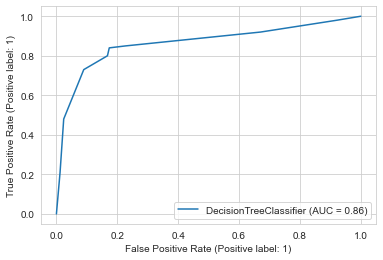

In [407]:
plot_roc_curve(fimal_mod,x_test,y_test)
plt.show()